## Analizador Lexico
Un analizador lexico transforma una entrada en tokens

In [99]:
entrada = "El carro es negro o es azul"

print("\n" ,entrada)
print(len(entrada))



 El carro es negro o es azul
27


In [100]:
from enum import Enum

class TipoToken(Enum):
    O = 1
    Y = 2
    S = 3
    N = 4
    E = 5
    P = 6

In [101]:
def analizador_lexico(frase : str) -> list:

    tokens = frase.lower().split()  
    lexemas = []
    for token in tokens:
        if token == 'o':
                lexemas.append( TipoToken.O )
        elif token == 'y':
                lexemas.append(TipoToken.Y)
        elif token == 'si':
                lexemas.append(TipoToken.S)
        elif token == 'entonces':
                lexemas.append(TipoToken.E)
        elif token == 'no':
                lexemas.append(TipoToken.N)
        else :
            lexemas.append(TipoToken.P )
    return lexemas


## Analizador Sintactico

In [102]:
class EstadosAnalizador(Enum):
    INICIO = 1
    PRECEDENTE = 2
    ERROR1 = 3
    NEGACION = 4
    CONSECUENTE = 5
    ATOMO = 6
    DISYUNCION = 7
    CONJUNCION = 8
    ERROR2 = 9
    FIN = 10

In [103]:
def inicio(lexema_):
    lexema = lexema_
    if lexema == TipoToken.P:
        return EstadosAnalizador.ATOMO
    elif lexema == TipoToken.N:
        return EstadosAnalizador.NEGACION
    elif lexema == TipoToken.S:
        return EstadosAnalizador.DISYUNCION
    elif lexema == TipoToken.Y or TipoToken.O or TipoToken.E:
        return EstadosAnalizador.ERROR1

In [104]:
def atomo(lexema_):
    lexema = lexema_
    if lexema == TipoToken.P:
        return EstadosAnalizador.ATOMO
    elif lexema == TipoToken.N:
        return EstadosAnalizador.NEGACION
    elif lexema == TipoToken.S:
        return EstadosAnalizador.DISYUNCION
    elif lexema == TipoToken.Y:
        return EstadosAnalizador.CONJUNCION
    elif lexema == TipoToken.O:
        return EstadosAnalizador.DISYUNCION
    elif lexema == TipoToken.E:
        return EstadosAnalizador.CONSECUENTE

In [105]:
def precedente(lexema_):
    lexema = lexema_
    if lexema == TipoToken.P:
        return EstadosAnalizador.ATOMO
    elif lexema == TipoToken.N:
        return EstadosAnalizador.NEGACION
    elif lexema == TipoToken.Y or TipoToken.O or TipoToken.E or TipoToken.S:
        return EstadosAnalizador.ERROR1

In [106]:
def negacion(lexema_):
    lexema = lexema_
    if lexema == TipoToken.P:
        return EstadosAnalizador.ATOMO
    elif lexema == TipoToken.Y or TipoToken.O or TipoToken.E or TipoToken.S:
        return EstadosAnalizador.ERROR2

In [107]:
def consecuente(lexema_):
    lexema = lexema_
    if lexema == TipoToken.P:
        return EstadosAnalizador.ATOMO
    elif lexema == TipoToken.N:
        return EstadosAnalizador.NEGACION
    elif lexema == TipoToken.Y or TipoToken.O or TipoToken.E or TipoToken.S:
        return EstadosAnalizador.ERROR1

In [108]:
def conjuncion(lexema_):
    lexema = lexema_
    if lexema == TipoToken.P:
        return EstadosAnalizador.ATOMO
    elif lexema == TipoToken.N:
        return EstadosAnalizador.NEGACION
    elif lexema == TipoToken.Y or TipoToken.O or TipoToken.E or TipoToken.S:
        return EstadosAnalizador.ERROR1

In [109]:
def disyuncion(lexema_):
    lexema = lexema_
    if lexema == TipoToken.P:
        return EstadosAnalizador.ATOMO
    elif lexema == TipoToken.N:
        return EstadosAnalizador.NEGACION
    elif lexema == TipoToken.Y or TipoToken.O or TipoToken.E or TipoToken.S:
        return EstadosAnalizador.ERROR1

In [110]:
def error1(lexema_):
    lexema = lexema_
    return EstadosAnalizador.ERROR1 

In [111]:
def error2(lexema_):
    lexema = lexema_
    return EstadosAnalizador.ERROR2 

In [112]:
def analizador_sintactico(lexemas_ : list):

    EstadoActual = EstadosAnalizador.INICIO
    
    for lexema in lexemas_:
        if EstadoActual == EstadosAnalizador.INICIO:
            EstadoActual = inicio(lexema)
        elif EstadoActual == EstadosAnalizador.ATOMO:
            EstadoActual = atomo(lexema)
        elif EstadoActual == EstadosAnalizador.CONJUNCION:
            EstadoActual = conjuncion(lexema)
        elif EstadoActual == EstadosAnalizador.CONSECUENTE:
            EstadoActual = consecuente(lexema)
        elif EstadoActual == EstadosAnalizador.DISYUNCION:
            EstadoActual = disyuncion(lexema)
        elif EstadoActual == EstadosAnalizador.ERROR1:
            EstadoActual = error1(lexema)
        elif EstadoActual == EstadosAnalizador.ERROR2:
            EstadoActual =  error2(lexema)
        elif EstadoActual == EstadosAnalizador.NEGACION:
            EstadoActual = negacion(lexema)
        elif EstadoActual == EstadosAnalizador.PRECEDENTE:
            EstadoActual = precedente(lexema)
    if EstadoActual == EstadosAnalizador.ATOMO:
        print("Frase correcta")
    else: 
        print("Frase incorrecta")    
    return EstadoActual

In [113]:
frases = []
frases.append("El carro es negro o es de dia")
frases.append("Si si es de dia no es de noche")
frases.append("Si si es de dia no es de noche")

for frase in frases:
    print(frase)
    print(analizador_sintactico(analizador_lexico(frase)))

El carro es negro o es de dia
Frase correcta
EstadosAnalizador.ATOMO
Si si es de dia no es de noche
Frase incorrecta
EstadosAnalizador.ERROR1
Si si es de dia no es de noche
Frase incorrecta
EstadosAnalizador.ERROR1


In [114]:
class Nodo:
    def __init__(self, dato):
        # "dato" puede ser de cualquier tipo, incluso un objeto si se sobrescriben los operadores de comparación
        self.dato = dato
        self.izquierda = None
        self.derecha = None

In [115]:
class Arbol:
    # Funciones privadas
    def __init__(self, dato):
        self.raiz = Nodo(dato)

    def __agregar_recursivo(self, nodo, dato):
        if dato < nodo.dato:
            if nodo.izquierda is None:
                nodo.izquierda = Nodo(dato)
            else:
                self.__agregar_recursivo(nodo.izquierda, dato)
        else:
            if nodo.derecha is None:
                nodo.derecha = Nodo(dato)
            else:
                self.__agregar_recursivo(nodo.derecha, dato)

    def __inorden_recursivo(self, nodo):
        if nodo is not None:
            self.__inorden_recursivo(nodo.izquierda)
            print(nodo.dato, end=", ")
            self.__inorden_recursivo(nodo.derecha)

    def __preorden_recursivo(self, nodo):
        if nodo is not None:
            print(nodo.dato, end=", ")
            self.__preorden_recursivo(nodo.izquierda)
            self.__preorden_recursivo(nodo.derecha)

    def __postorden_recursivo(self, nodo):
        if nodo is not None:
            self.__postorden_recursivo(nodo.izquierda)
            self.__postorden_recursivo(nodo.derecha)
            print(nodo.dato, end=", ")

    def __buscar(self, nodo, busqueda):
        if nodo is None:
            return None
        if nodo.dato == busqueda:
            return nodo
        if busqueda < nodo.dato:
            return self.__buscar(nodo.izquierda, busqueda)
        else:
            return self.__buscar(nodo.derecha, busqueda)

    # Funciones públicas

    def agregar(self, dato):
        self.__agregar_recursivo(self.raiz, dato)

    def inorden(self):
        print("Imprimiendo árbol inorden: ")
        self.__inorden_recursivo(self.raiz)
        print("")

    def preorden(self):
        print("Imprimiendo árbol preorden: ")
        self.__preorden_recursivo(self.raiz)
        print("")

    def postorden(self):
        print("Imprimiendo árbol postorden: ")
        self.__postorden_recursivo(self.raiz)
        print("")

    def buscar(self, busqueda):
        return self.__buscar(self.raiz, busqueda)

In [116]:
import matplotlib.pyplot as plt
import networkx as nx

class Node:
    def __init__(self, value):
        self.value = value
        self.children = []

    def add_child(self, child):
        self.children.append(child)

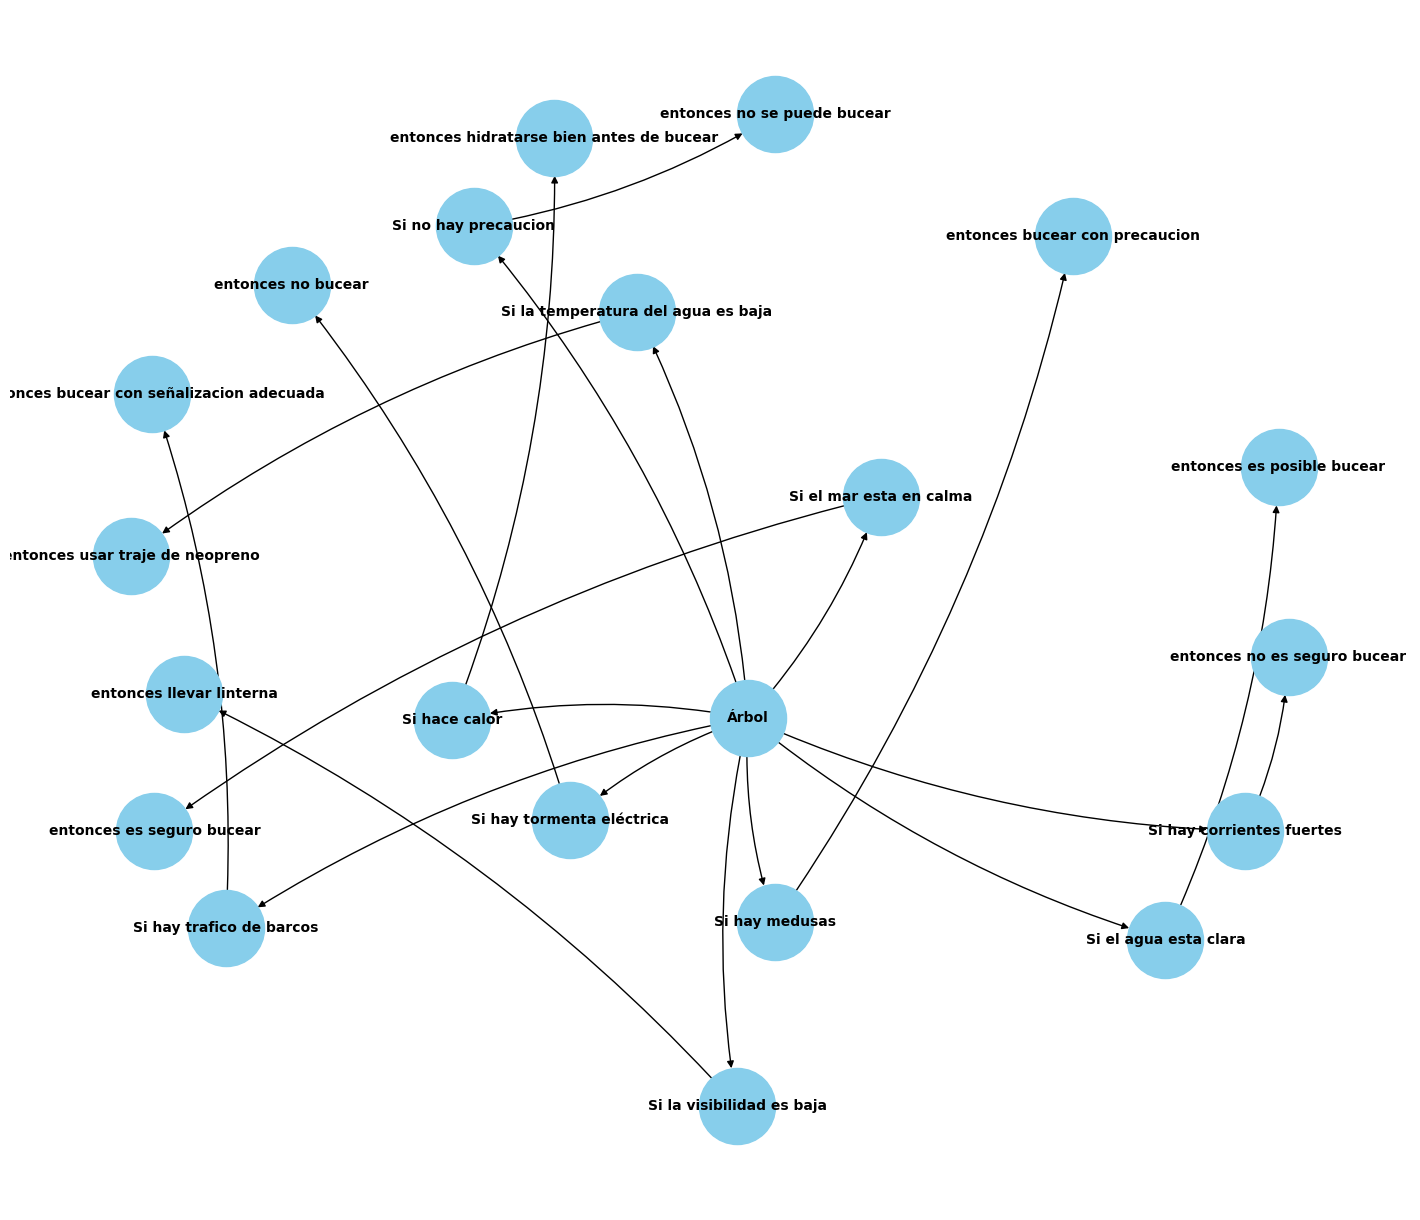

In [117]:
def generate_tree():
    # Crear el árbol de expresiones
    root = Node('Árbol')

    # Crear nodos para cada expresión
    ex1 = Node('Si el agua esta clara')
    ex1_then = Node('entonces es posible bucear')
    ex1.add_child(ex1_then)

    ex2 = Node('Si hay medusas')
    ex2_then = Node('entonces bucear con precaucion')
    ex2.add_child(ex2_then)

    ex3 = Node('Si no hay precaucion')
    ex3_then = Node('entonces no se puede bucear')
    ex3.add_child(ex3_then)

    ex4 = Node('Si hay corrientes fuertes')
    ex4_then = Node('entonces no es seguro bucear')
    ex4.add_child(ex4_then)

    ex5 = Node('Si la visibilidad es baja')
    ex5_then = Node('entonces llevar linterna')
    ex5.add_child(ex5_then)

    ex6 = Node('Si hay tormenta eléctrica')
    ex6_then = Node('entonces no bucear')
    ex6.add_child(ex6_then)

    ex7 = Node('Si el mar esta en calma')
    ex7_then = Node('entonces es seguro bucear')
    ex7.add_child(ex7_then)

    ex8 = Node('Si la temperatura del agua es baja')
    ex8_then = Node('entonces usar traje de neopreno')
    ex8.add_child(ex8_then)

    ex9 = Node('Si hay trafico de barcos')
    ex9_then = Node('entonces bucear con señalizacion adecuada')
    ex9.add_child(ex9_then)

    ex10 = Node('Si hace calor')
    ex10_then = Node('entonces hidratarse bien antes de bucear')
    ex10.add_child(ex10_then)

    # Agregar expresiones al nodo raíz
    root.add_child(ex1)
    root.add_child(ex2)
    root.add_child(ex3)
    root.add_child(ex4)
    root.add_child(ex5)
    root.add_child(ex6)
    root.add_child(ex7)
    root.add_child(ex8)
    root.add_child(ex9)
    root.add_child(ex10)

    return root

def add_edges(G, node, parent=None):
    if parent:
        G.add_edge(parent.value, node.value)
    for child in node.children:
        add_edges(G, child, node)

def visualize_tree(root):
    G = nx.DiGraph()
    add_edges(G, root)
    
    pos = nx.spring_layout(G, k=1.2, iterations=50)  # Ajustar el parámetro `k` para espaciar los nodos
    plt.figure(figsize=(14, 12))  # Ajustar el tamaño de la figura
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True, connectionstyle='arc3,rad=0.1')
    plt.show()

root = generate_tree()
visualize_tree(root)